## 予測アルゴリズムの完成を目指す
- ①変数の特徴を見る
- ②特徴量を考える
- ③アルゴリズムの検討をする。

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

train.index = pd.to_datetime(train["datetime"])

train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [50]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [51]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2014-8-21,水,メンチカツ,お楽しみメニュー,ママの会,曇,--
freq,1,43,6,12,9,53,169


In [52]:
train["precipitation"]

datetime
2013-11-18    --
2013-11-19    --
2013-11-20    --
2013-11-21    --
2013-11-22    --
              ..
2014-09-24     0
2014-09-25     0
2014-09-26    --
2014-09-29    --
2014-09-30    --
Name: precipitation, Length: 207, dtype: object

### データ改編と特徴量の作成
- NaNを補完する
- datetimeから日時情報を取り出したい

In [53]:
train["remarks"] = train["remarks"].fillna("なし")
train["event"] = train["event"].fillna("なし")
train["payday"] = train["payday"].fillna(0)
train["precipitation"] =train["precipitation"].apply(lambda x : -1 if x == "--" else float(x))
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))

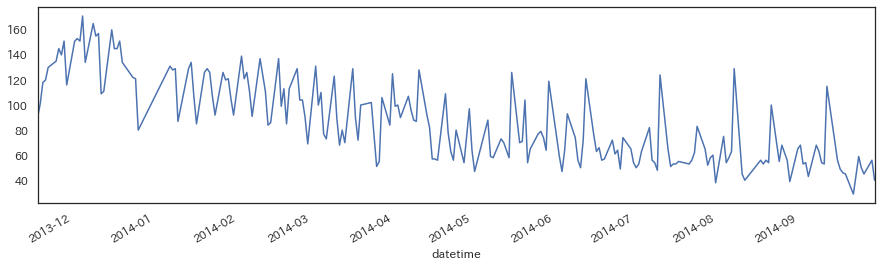

In [54]:
train["y"].plot(figsize=(15,4))

#### ここまででわかること
- 日付が進むことによって、全体的には減少傾向にあること
- ところどころ何かの要因で上に跳ね上がっている場所が存在する。
- 説明変数とyの関係性を見ていくべき

### 相関関係を見てみる
- 数字情報を持つものは散布図で確認
- ステータスで与えられるものは箱ひげ図で確認する

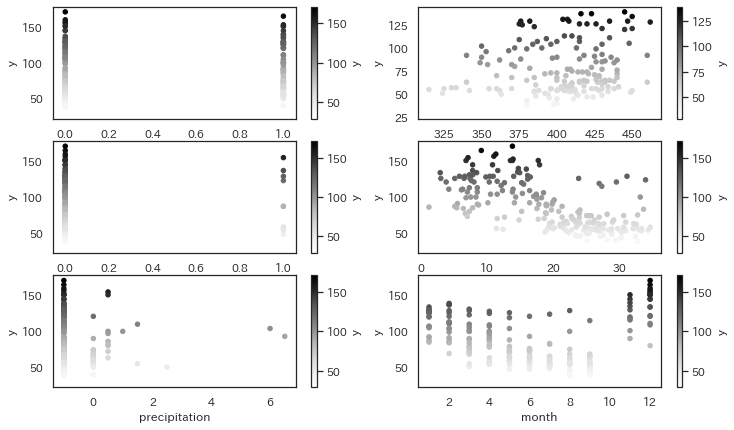

In [55]:
fig,ax = plt.subplots(3,2,figsize=(12,7))

train.plot.scatter(x="soldout",y="y",ax=ax[0][0],c=1)
train.plot.scatter(x="kcal",y="y",ax=ax[0][1],c=1)
train.plot.scatter(x="payday",y="y",ax=ax[1][0],c=1)
train.plot.scatter(x="temperature",y="y",ax=ax[1][1],c=1)
train.plot.scatter(x="precipitation",y="y",ax=ax[2][0],c=1)
train.plot.scatter(x="month",y="y",ax=ax[2][1],c=1)

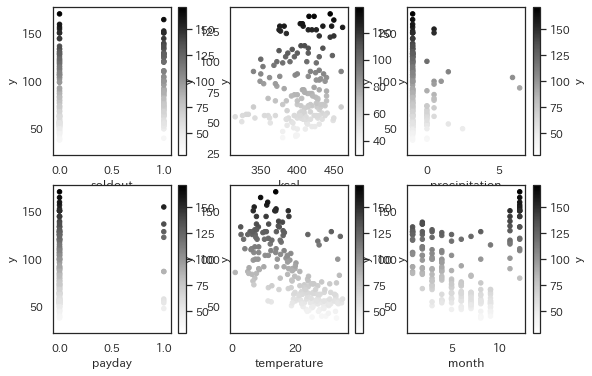

In [56]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0], c=1)
train.plot.scatter(x="kcal", y="y", ax=ax[0][1], c=1)
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2], c=1)
train.plot.scatter(x="payday", y="y", ax=ax[1][0], c=1)
train.plot.scatter(x="temperature", y="y", ax=ax[1][1], c=1)
train.plot.scatter(x="month", y="y", ax=ax[1][2],c=1)

- kicalとtemperatureがやや顕著に見える

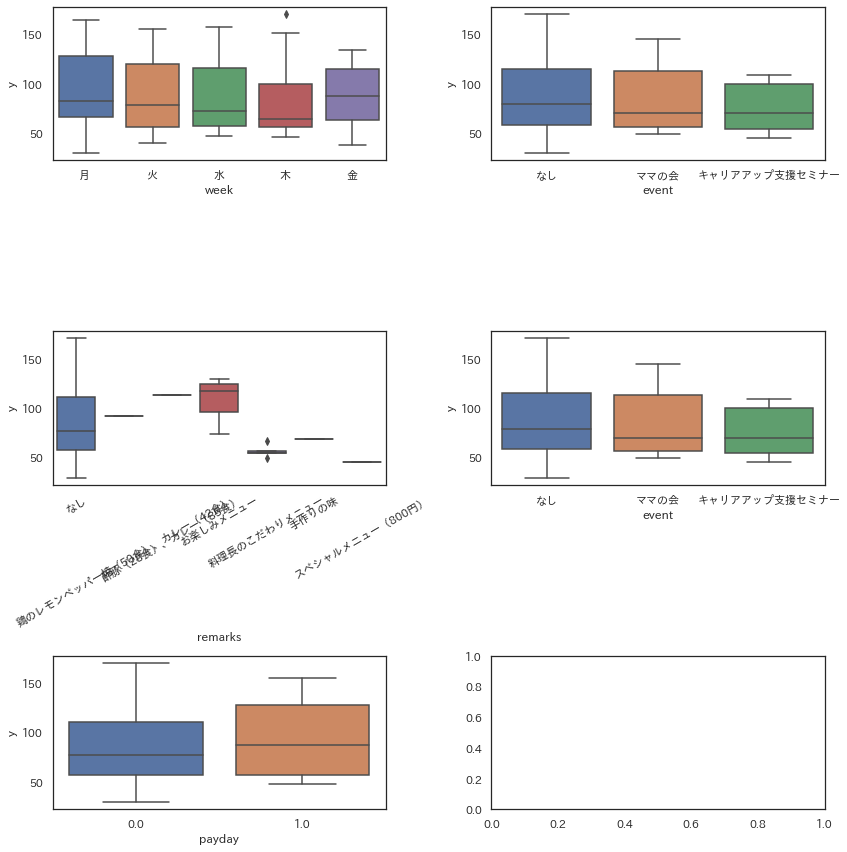

In [57]:
sns.set(font="IPAexGothic",style="white")#日本語の指定
fig, ax = plt.subplots(3,2,figsize=(12,12))

sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="event",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
sns.boxplot(x="payday",y="y",data=train,ax=ax[2][0])
plt.tight_layout()

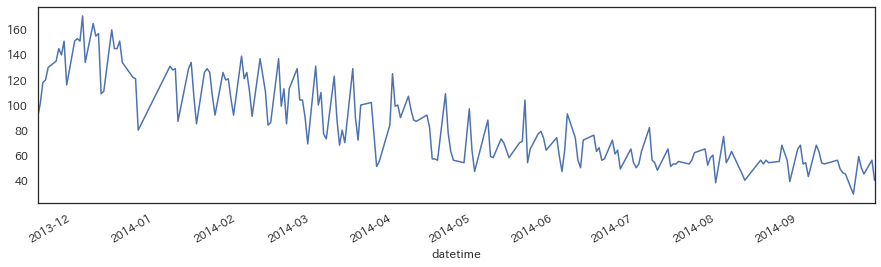

In [58]:
train[train["remarks"]!= "お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv",header=None)

In [60]:
train["t"] = 1
test["t"] = 0
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,t
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,1
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,1
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,1
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,1
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,1


In [61]:
dat1 = pd.concat([train,test],sort=True).reset_index()
dat1

,index,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y
0,0,2013-11-18,NaN,NaN,厚切りイカフライ,NaN,--,NaN,0,1,19.8,快晴,月,90.0
1,1,2013-11-19,NaN,NaN,手作りヒレカツ,NaN,--,NaN,1,1,17.0,快晴,火,101.0
2,2,2013-11-20,NaN,NaN,白身魚唐揚げ野菜あん,NaN,--,NaN,0,1,15.5,快晴,水,118.0
3,3,2013-11-21,NaN,NaN,若鶏ピリ辛焼,NaN,--,NaN,1,1,15.2,快晴,木,120.0
4,4,2013-11-22,NaN,NaN,ビッグメンチカツ,NaN,--,NaN,1,1,16.1,快晴,金,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,35,2014-11-21,NaN,NaN,ロコモコ丼,NaN,--,お楽しみメニュー,0,0,14.9,快晴,金,NaN
243,36,2014-11-25,NaN,460.0,なすと挽肉のはさみ揚げ,NaN,1.5,NaN,1,0,11.4,雨,火,NaN
244,37,2014-11-26,NaN,415.0,鶏肉の治部煮風,NaN,1,NaN,1,0,9.2,雨,水,NaN
245,38,2014-11-27,NaN,420.0,牛丼風,NaN,--,NaN,0,0,15.1,快晴,木,NaN


In [62]:
dat = pd.concat([train,test],sort=True).reset_index(drop=True)
dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y
0,2013-11-18,NaN,NaN,厚切りイカフライ,NaN,--,NaN,0,1,19.8,快晴,月,90.0
1,2013-11-19,NaN,NaN,手作りヒレカツ,NaN,--,NaN,1,1,17.0,快晴,火,101.0
2,2013-11-20,NaN,NaN,白身魚唐揚げ野菜あん,NaN,--,NaN,0,1,15.5,快晴,水,118.0
3,2013-11-21,NaN,NaN,若鶏ピリ辛焼,NaN,--,NaN,1,1,15.2,快晴,木,120.0
4,2013-11-22,NaN,NaN,ビッグメンチカツ,NaN,--,NaN,1,1,16.1,快晴,金,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2014-11-21,NaN,NaN,ロコモコ丼,NaN,--,お楽しみメニュー,0,0,14.9,快晴,金,NaN
243,2014-11-25,NaN,460.0,なすと挽肉のはさみ揚げ,NaN,1.5,NaN,1,0,11.4,雨,火,NaN
244,2014-11-26,NaN,415.0,鶏肉の治部煮風,NaN,1,NaN,1,0,9.2,雨,水,NaN
245,2014-11-27,NaN,420.0,牛丼風,NaN,--,NaN,0,0,15.1,快晴,木,NaN


In [63]:
dat.index = pd.to_datetime(dat["datetime"])
dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y
datetime,,,,,,,,,,,,,
2013-11-18,2013-11-18,NaN,NaN,厚切りイカフライ,NaN,--,NaN,0,1,19.8,快晴,月,90.0
2013-11-19,2013-11-19,NaN,NaN,手作りヒレカツ,NaN,--,NaN,1,1,17.0,快晴,火,101.0
2013-11-20,2013-11-20,NaN,NaN,白身魚唐揚げ野菜あん,NaN,--,NaN,0,1,15.5,快晴,水,118.0
2013-11-21,2013-11-21,NaN,NaN,若鶏ピリ辛焼,NaN,--,NaN,1,1,15.2,快晴,木,120.0
2013-11-22,2013-11-22,NaN,NaN,ビッグメンチカツ,NaN,--,NaN,1,1,16.1,快晴,金,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-21,2014-11-21,NaN,NaN,ロコモコ丼,NaN,--,お楽しみメニュー,0,0,14.9,快晴,金,NaN
2014-11-25,2014-11-25,NaN,460.0,なすと挽肉のはさみ揚げ,NaN,1.5,NaN,1,0,11.4,雨,火,NaN
2014-11-26,2014-11-26,NaN,415.0,鶏肉の治部煮風,NaN,1,NaN,1,0,9.2,雨,水,NaN


In [64]:
dat = dat["2014-05-01":]
dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y
datetime,,,,,,,,,,,,,
2014-05-01,2014-5-1,NaN,415.0,マーボ茄子,NaN,--,NaN,0,1,24.0,晴れ,木,64.0
2014-05-02,2014-5-2,NaN,420.0,鶏の天ぷら,NaN,--,NaN,0,1,23.3,晴れ,金,47.0
2014-05-07,2014-5-7,NaN,415.0,肉じゃが,NaN,--,NaN,1,1,18.9,晴れ,水,88.0
2014-05-08,2014-5-8,NaN,405.0,メンチカツ,NaN,--,NaN,0,1,21.0,薄曇,木,59.0
2014-05-09,2014-5-9,NaN,434.0,手作りチキンカツ,1.0,--,NaN,1,1,23.4,晴れ,金,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-21,2014-11-21,NaN,NaN,ロコモコ丼,NaN,--,お楽しみメニュー,0,0,14.9,快晴,金,NaN
2014-11-25,2014-11-25,NaN,460.0,なすと挽肉のはさみ揚げ,NaN,1.5,NaN,1,0,11.4,雨,火,NaN
2014-11-26,2014-11-26,NaN,415.0,鶏肉の治部煮風,NaN,1,NaN,1,0,9.2,雨,水,NaN


In [65]:
dat = dat.reset_index(drop=True)
dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y
0,2014-5-1,NaN,415.0,マーボ茄子,NaN,--,NaN,0,1,24.0,晴れ,木,64.0
1,2014-5-2,NaN,420.0,鶏の天ぷら,NaN,--,NaN,0,1,23.3,晴れ,金,47.0
2,2014-5-7,NaN,415.0,肉じゃが,NaN,--,NaN,1,1,18.9,晴れ,水,88.0
3,2014-5-8,NaN,405.0,メンチカツ,NaN,--,NaN,0,1,21.0,薄曇,木,59.0
4,2014-5-9,NaN,434.0,手作りチキンカツ,1.0,--,NaN,1,1,23.4,晴れ,金,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2014-11-21,NaN,NaN,ロコモコ丼,NaN,--,お楽しみメニュー,0,0,14.9,快晴,金,NaN
137,2014-11-25,NaN,460.0,なすと挽肉のはさみ揚げ,NaN,1.5,NaN,1,0,11.4,雨,火,NaN
138,2014-11-26,NaN,415.0,鶏肉の治部煮風,NaN,1,NaN,1,0,9.2,雨,水,NaN
139,2014-11-27,NaN,420.0,牛丼風,NaN,--,NaN,0,0,15.1,快晴,木,NaN


In [66]:
dat["days"] = dat.index


dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y,days
0,2014-5-1,NaN,415.0,マーボ茄子,NaN,--,NaN,0,1,24.0,晴れ,木,64.0,0
1,2014-5-2,NaN,420.0,鶏の天ぷら,NaN,--,NaN,0,1,23.3,晴れ,金,47.0,1
2,2014-5-7,NaN,415.0,肉じゃが,NaN,--,NaN,1,1,18.9,晴れ,水,88.0,2
3,2014-5-8,NaN,405.0,メンチカツ,NaN,--,NaN,0,1,21.0,薄曇,木,59.0,3
4,2014-5-9,NaN,434.0,手作りチキンカツ,1.0,--,NaN,1,1,23.4,晴れ,金,58.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2014-11-21,NaN,NaN,ロコモコ丼,NaN,--,お楽しみメニュー,0,0,14.9,快晴,金,NaN,136
137,2014-11-25,NaN,460.0,なすと挽肉のはさみ揚げ,NaN,1.5,NaN,1,0,11.4,雨,火,NaN,137
138,2014-11-26,NaN,415.0,鶏肉の治部煮風,NaN,1,NaN,1,0,9.2,雨,水,NaN,138
139,2014-11-27,NaN,420.0,牛丼風,NaN,--,NaN,0,0,15.1,快晴,木,NaN,139


In [67]:
dat["precipitation"] = dat["precipitation"].apply(lambda x : -1 if x=="--" else x).astype(np.float)
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

cols = ["precipitation","weather","days","fun","curry","y"]

In [68]:
def learning(trainX,y_train):
    model1 = LR()
    model2 = RF(n_estimators=100,max_depth=4,random_state=777)
    
    model1.fit(trainX["days"].values.reshape(-1,1),y_train)
    pred = model1.predict(trainX["days"].values.reshape(-1,1))
    
    pred_sub = y_train - pred
    model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")],pred_sub)
    return model1, model2

In [69]:
train.iloc[:,~train.columns.str.match("weather")]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,precipitation,temperature,t
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,--,19.8,1
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,--,17.0,1
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,--,15.5,1
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,--,15.2,1
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,--,16.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,0,24.8,1
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,0,25.4,1
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,--,27.1,1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,--,26.6,1


In [70]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,t
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,1
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,1
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,1
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,1
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8,1
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4,1
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1,1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6,1


In [71]:
kf = KFold(n_splits=5,random_state=777)
tr = dat[dat["t"]==1][cols]
tr.head()

,precipitation,weather,days,fun,curry,y
0,-1.0,晴れ,0,0,0,64.0
1,-1.0,晴れ,1,0,0,47.0
2,-1.0,晴れ,2,0,0,88.0
3,-1.0,薄曇,3,0,0,59.0
4,-1.0,晴れ,4,0,0,58.0


In [72]:
kf = KFold(n_splits=5,random_state=777)
tr = dat[dat["t"]==1][cols]

trains = []
tests = []
for train_index, test_index in kf.split(tr):
    tr.loc[train_index,"tt"] = 1
    tr.loc[test_index,"tt"] = 0
    tr["tt"] = tr["tt"].astype(np.int)
    tmp = pd.get_dummies(tr)
    
    trainX = tmp[tmp["tt"]==1]
    del trainX["tt"]
    testX = tmp[tmp["tt"]==0]
    del testX["tt"]
    y_train = tmp[tmp["tt"]==1]["y"]
    y_test = tmp[tmp["tt"]==0]["y"]
    
    model1, model2 = learning(trainX, y_train)
    
    pred_train = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:, ~trainX.columns.str.match("y")])
    pred_test = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:, ~testX.columns.str.match("y")])
   
    print("TRAIN:",MSE(y_train,pred_train)**0.5, "VARIDATE",MSE(y_test, pred_test)**0.5)
    trains.append(MSE(y_train,pred_train)**0.5)
    tests.append(MSE(y_test, pred_test)**0.5)
print("AVG")
print(np.array(trains).mean(), np.array(tests).mean())

TRAIN: 7.567045890582926 VARIDATE 12.108512732864117
TRAIN: 7.898879809389376 VARIDATE 10.596024908707413
TRAIN: 8.266274249088164 VARIDATE 8.843075664182068
TRAIN: 7.954599685874008 VARIDATE 19.93205551309561
TRAIN: 7.913918883780418 VARIDATE 9.443466823946043
AVG
7.920143703742978 12.184627128559049


In [73]:
cols = ["precipitation","weather","days","fun","curry","y","t"]
tmp = pd.get_dummies(dat[cols])
trainX = tmp[tmp["t"]==1]
del trainX["t"]
testX = tmp[tmp["t"]==0]
del testX["t"]
y_train = tmp[tmp["t"]==1]["y"]
y_test = tmp[tmp["t"]==0]["y"]

RMSE 7.986229908417227


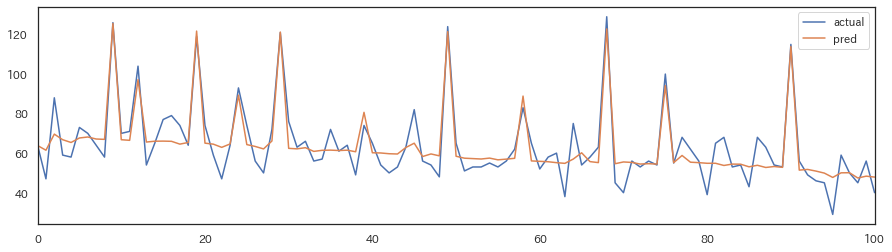

In [74]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:,~trainX.columns.str.match("y")])

p = pd.DataFrame({"actual":y_train,"pred":pred})
p.plot(figsize=(15,4))
print("RMSE",MSE(y_train,pred)**0.5)

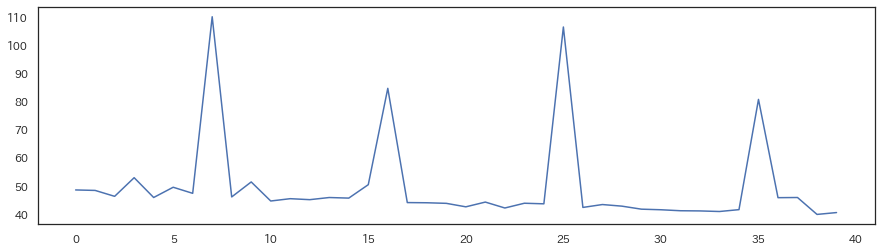

In [75]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:,~testX.columns.str.match("y")])
plt.figure(figsize=(15,4))
plt.plot(pred)


In [76]:
sample[1] = pred
sample.to_csv("submit01.csv",index=None,header=None)